**Initializing Logging**

In [1]:
import logging

logging.basicConfig(filename = "Logging.txt",level=logging.INFO,filemode='a',format = '%(asctime)s %(levelname)s-%(message)s',datefmt='%Y-%m-%d %H:%M:%S')
logger = logging.getLogger()

**Pre-requisite**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
logger.info("Successfully Imported pre-requisite ")

**Mounting Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
logger.info("Drive mounted successfully")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_df = pd.read_csv("/content/drive/MyDrive/backorder_pred_data/Kaggle_Training_Dataset_v2.csv")
logger.info("Dataset Imported successfully")

test_df = pd.read_csv("/content/drive/MyDrive/backorder_pred_data/Kaggle_Test_Dataset_v2.csv")
logger.info("Test Dataset Imported successfully")

In [5]:
train_df[:1687858]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687853,1489920,0.0,2.0,0.0,2071.0,3025.0,3412.0,4.0,764.0,764.0,765.0,657.0,No,0.0,0.98,0.99,4.0,No,No,No,No,No,Yes
1687854,1392420,124.0,8.0,140.0,410.0,780.0,1240.0,128.0,464.0,849.0,1074.0,111.0,No,0.0,0.85,0.90,1.0,No,No,No,Yes,No,No
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,No,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No


**Data Description**

- **sku** : unique id for a product

- **national_inv**: present national level of inventory of the product

- **lead_time** :   the amount of time between when a purchase order is placed to replenish products and when the order is received in the warehouse. 

- **in_transit_qty** : qty of goods in transit

- **forecast_3_month** : Forecasted sales of the product for the next 3 months.

- **forecast_6_month** : Forecasted sales of the product for the next 6 months.

- **forecast_9_month** : Forecasted sales of the product for the next 9 months.

- **sales_1_month** : Actual Sales of the product in the last 1 month.

- **sales_3_month** : Actual Sales of the product in the last 3 months.

- **sales_6_month** : Actual Sales of the product in the last 6 months.

- **sales_9_month** : Actual Sales of the product in the last 9 months.

- **min_bank**: Minimum amount of stock recommended to have.

- **potential_issue**: Any problem identified with the product or part.

- **pieces_past_due** :  product kept for long time, past their expiry date.

- **perf_6_month_avg** : Average performance of product over last 6 months. 

- **perf_12_month_avg**: Average performance of product over last 12 months. 

- **local_bo_qty** :  ( undeliverable orders / total number of orders )*100.

- **deck_risk** : risk associated with keeping the items in stock   

- **ppap_risk** : used to determine whether a production will produce parts with consistency and repeatability
- **stop_auto_buy** : Has the auto buy for the product, which was back ordered, cancelled.

**TARGET FEATURE** : went_on_backorder - Whether an items was backordered or not

**Getting Basic Data Insights**

In [6]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [7]:
train_df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
test_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [9]:
test_df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
final_df = train_df[:-1].append(test_df[:-1])
logger.info("Merging Train/Test Dataset")

In [11]:
final_df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [12]:
final_df.isnull().sum()

sku                       0
national_inv              0
lead_time            115617
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [13]:
final_df.shape

(1929935, 23)

In [14]:
duplicate_rows_df = final_df[final_df.duplicated()]
duplicate_rows_df.shape

(0, 23)

In [15]:
final_df = final_df.loc[:,~final_df.columns.duplicated(keep='first')]

In [16]:
final_df.reset_index(inplace=True)

**Exploratory Data Analysis**

In [17]:
logger.info("Exploratory Data Analysis Started")

In [18]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1929935.0,753255.875273,515330.925350,0.0,241241.50,722892.00,1205375.50,1687859.0
national_inv,1929935.0,496.568259,29573.434344,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1814318.0,7.878627,7.054212,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1929935.0,43.064397,1295.420493,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1929935.0,178.539864,5108.770174,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,1929935.0,345.465893,9831.562085,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1929935.0,506.606748,14345.430866,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1929935.0,55.368164,1884.377009,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1929935.0,174.663858,5188.855851,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1929935.0,341.565349,9585.030376,0.0,0.00,2.00,31.00,2146625.0


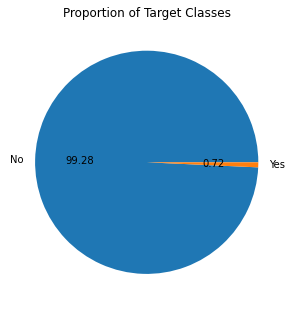

In [19]:
plt.figure(figsize=(5,6))
proportions = final_df.went_on_backorder.value_counts(1)*100
labels = final_df.went_on_backorder.value_counts(1).index
plt.pie(x=proportions,labels=labels,autopct="%.2f")
plt.title("Proportion of Target Classes")
plt.show()

In [20]:
final_df = final_df.drop(columns = ["sku"])

In [21]:
cat_col = final_df.select_dtypes(exclude=np.number).columns

In [22]:
num_col = final_df.select_dtypes(include=np.number).columns

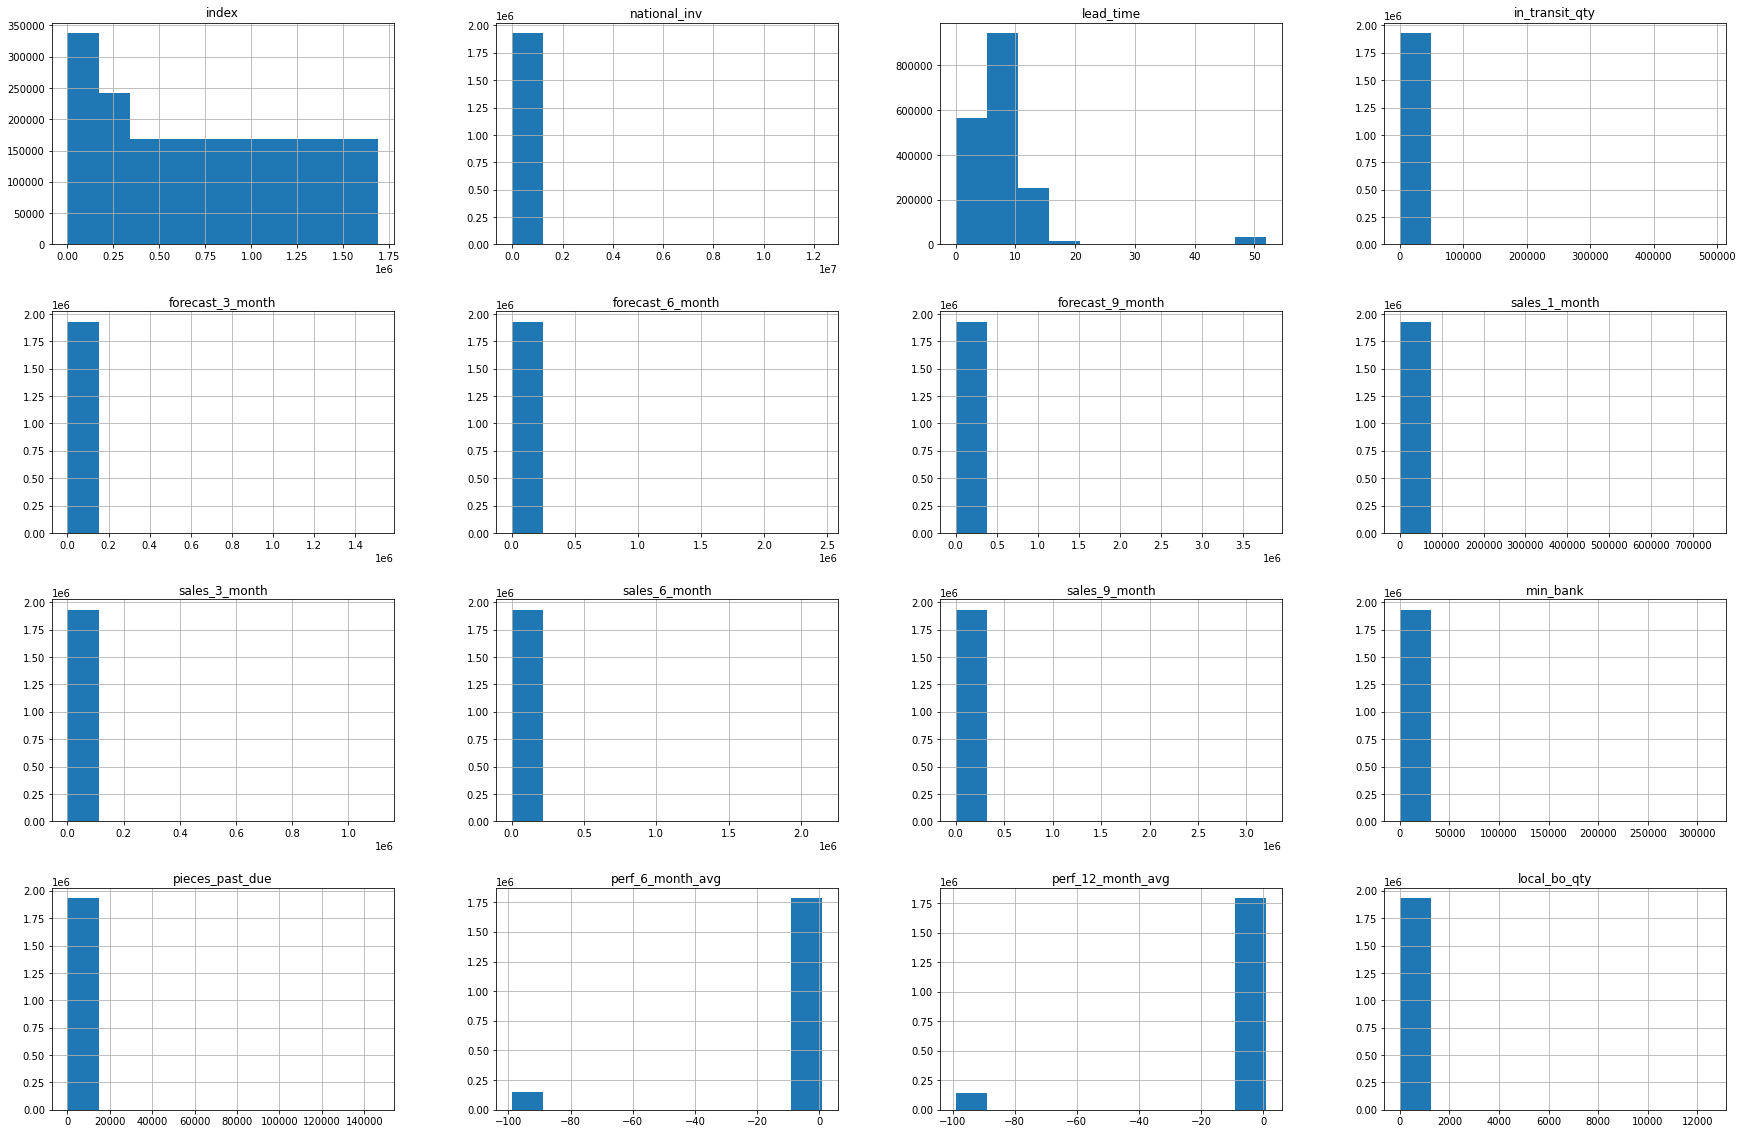

In [23]:
p=final_df.hist(figsize=(30,20))

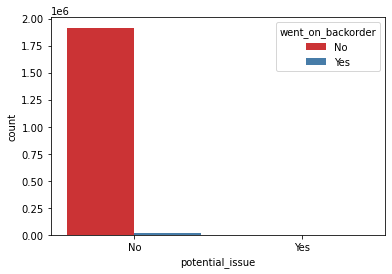

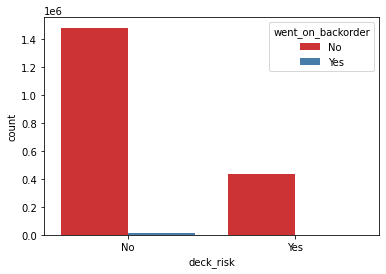

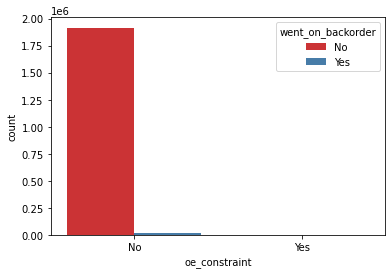

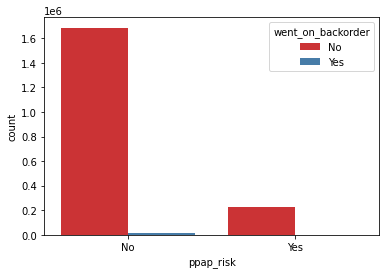

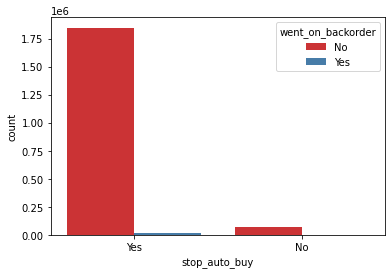

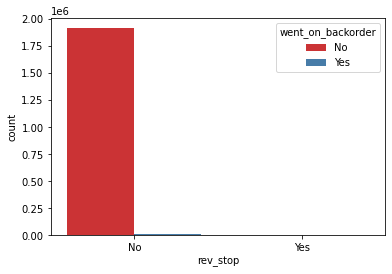

In [24]:
for column in cat_col:
    if column != "went_on_backorder":
        sns.countplot(column,data = final_df,hue = "went_on_backorder",palette="Set1")
        plt.show()

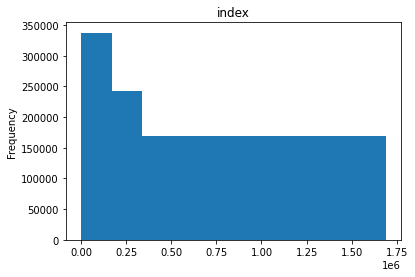

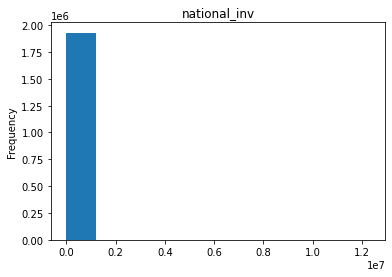

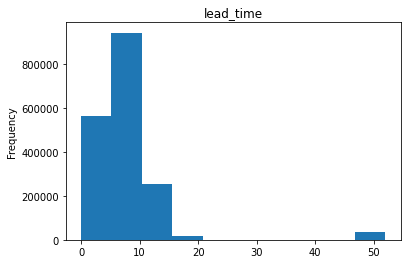

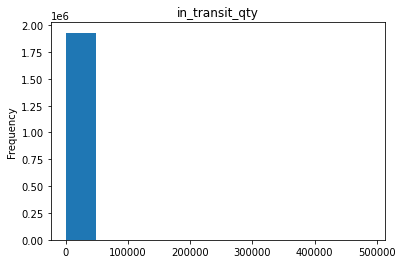

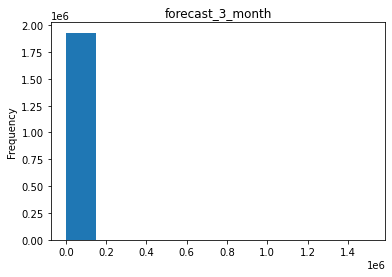

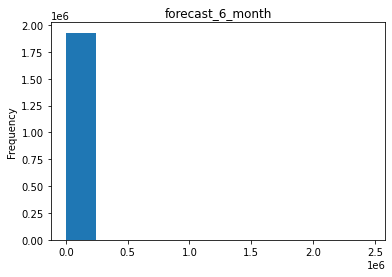

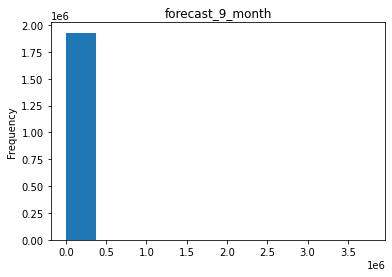

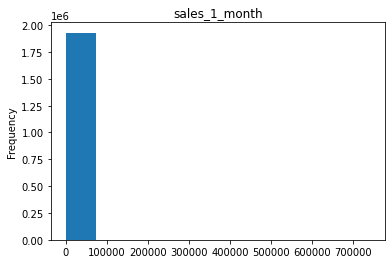

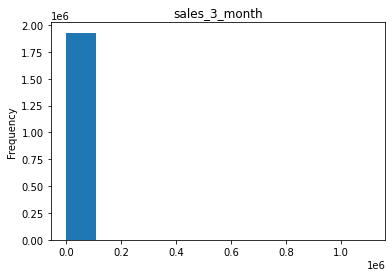

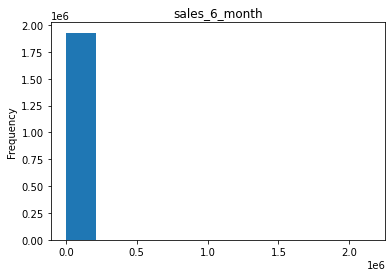

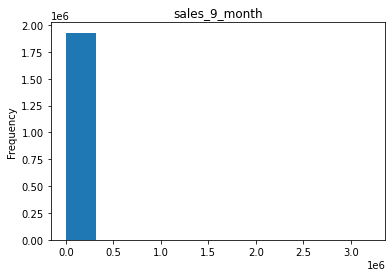

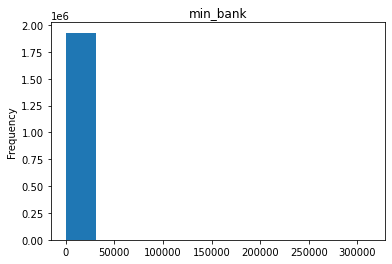

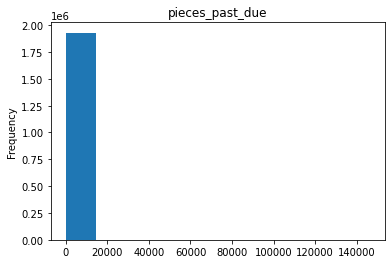

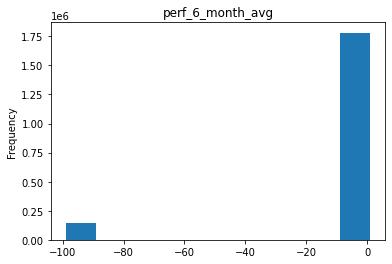

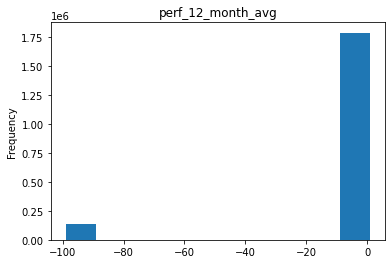

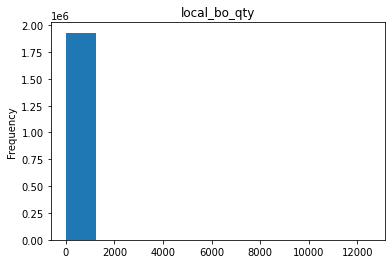

In [25]:
for column in num_col :
    final_df[column].plot.hist()
    plt.title(column)
    plt.show()

**Univariate Analysis**

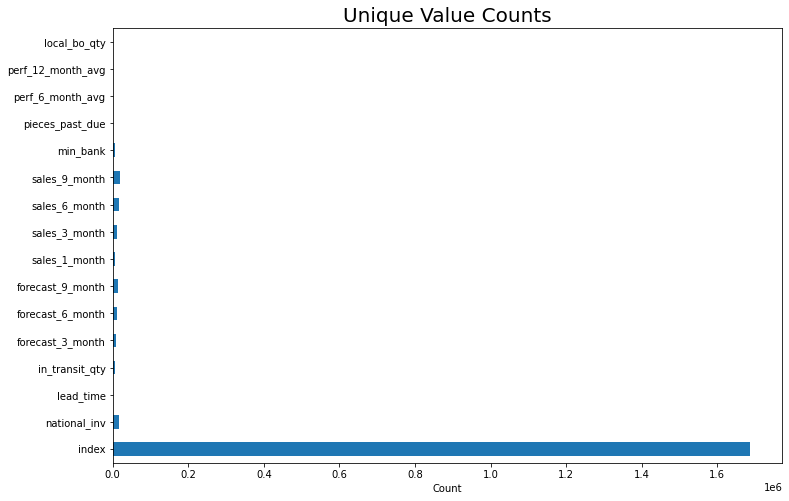

In [26]:
plt.figure(figsize=(12,8))
final_df.select_dtypes(include=np.number).nunique().plot(kind="barh")
plt.title("Unique Value Counts",size=20)
plt.xlabel("Count")
plt.show()


In [27]:
final_df.select_dtypes(include=np.number).nunique()

index                1687860
national_inv           15903
lead_time                 32
in_transit_qty          5543
forecast_3_month        8293
forecast_6_month       11788
forecast_9_month       14523
sales_1_month           6088
sales_3_month          11149
sales_6_month          15813
sales_9_month          19581
min_bank                5909
pieces_past_due          874
perf_6_month_avg         102
perf_12_month_avg        102
local_bo_qty             686
dtype: int64

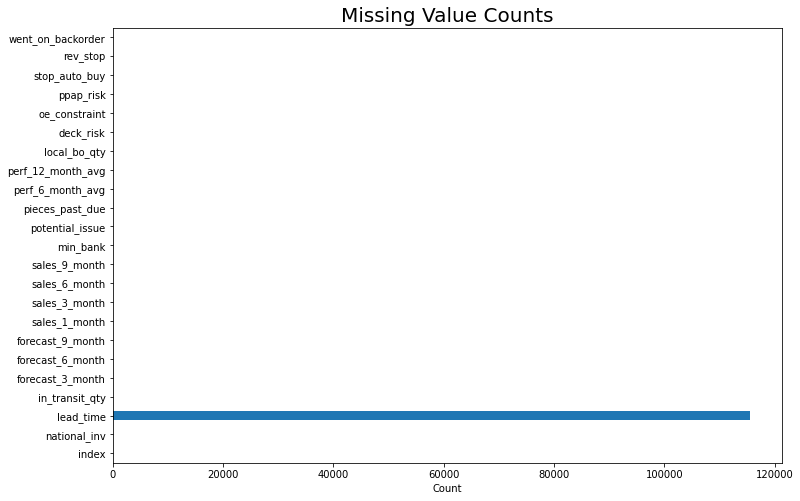

In [28]:
plt.figure(figsize=(12,8))
final_df.isnull().sum().plot(kind="barh")
plt.title("Missing Value Counts",size=20)
plt.xlabel("Count")
plt.show()

In [29]:
final_df.skew()

index                  0.177363
national_inv         340.220722
lead_time              4.556573
in_transit_qty       168.980074
forecast_3_month     142.782763
forecast_6_month     138.817975
forecast_9_month     142.683706
sales_1_month        193.720023
sales_3_month        141.813979
sales_6_month        138.927012
sales_9_month        135.435699
min_bank             130.962612
pieces_past_due      414.269992
perf_6_month_avg      -3.173341
perf_12_month_avg     -3.295184
local_bo_qty         149.620918
dtype: float64

In [30]:
logger.info(" Bi-variate Analysis")

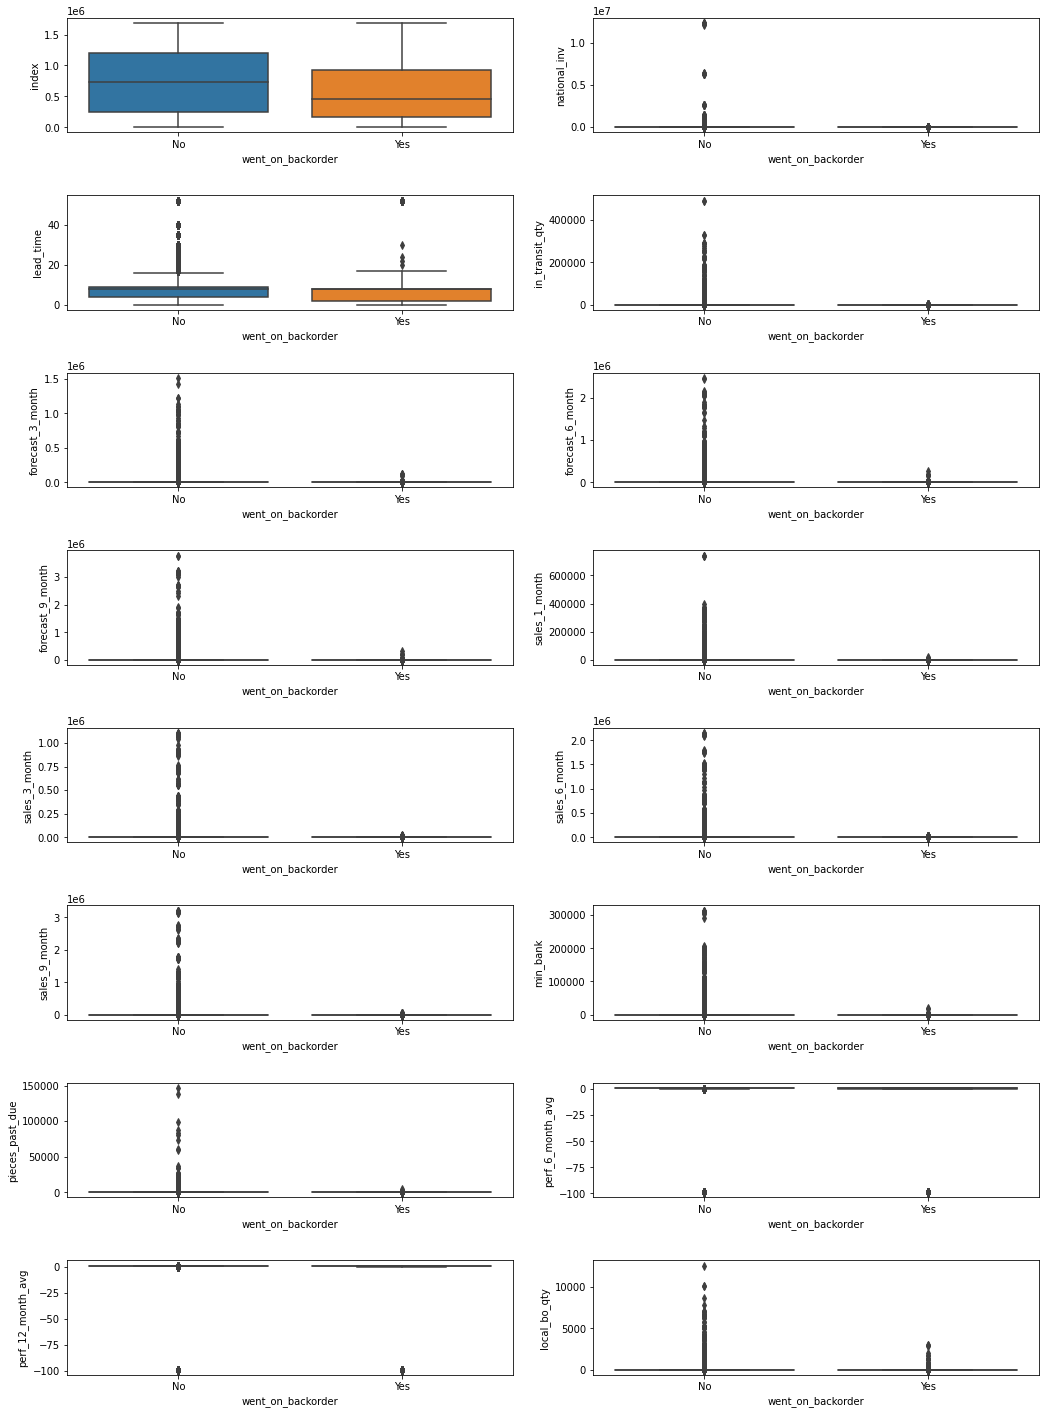

In [31]:
plt.figure(figsize=(15,20))
for index,col in enumerate(final_df.select_dtypes(include=np.number).columns):
    plt.subplot(8,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.boxplot(y=final_df[col],x=final_df.went_on_backorder)

In [32]:
for a, b in final_df[num_col].items():
        q1 = b.quantile(0.25)
        q3 = b.quantile(0.75)
        iqr = q3 - q1
        col_b = b[(b <= q1 - 1.5 * iqr) | (b >= q3 + 1.5 * iqr)]
        perc = np.shape(col_b)[0] * 100.0 / np.shape(final_df)[0]
        print("%s  = %.2f%%" % (a, perc))

index  = 0.00%
national_inv  = 15.10%
lead_time  = 2.10%
in_transit_qty  = 100.00%
forecast_3_month  = 21.26%
forecast_6_month  = 20.04%
forecast_9_month  = 19.77%
sales_1_month  = 18.48%
sales_3_month  = 17.27%
sales_6_month  = 17.27%
sales_9_month  = 17.30%
min_bank  = 21.01%
pieces_past_due  = 100.00%
perf_6_month_avg  = 11.12%
perf_12_month_avg  = 11.64%
local_bo_qty  = 100.00%


In [33]:
import scipy.stats as stats

In [34]:
#chi-square test
for col in final_df.select_dtypes(exclude=np.number).columns[1:-1]:
    print(col)
    print("p value of chi square:",stats.chi2_contingency(pd.crosstab(final_df.went_on_backorder,final_df[col]))[1])
    print()

deck_risk
p value of chi square: 5.933788521669091e-71

oe_constraint
p value of chi square: 1.0521651295231445e-05

ppap_risk
p value of chi square: 3.0994069960624216e-31

stop_auto_buy
p value of chi square: 0.0026469314858122623

rev_stop
p value of chi square: 0.5205331495379879



In [35]:
pd.crosstab(index=final_df.went_on_backorder,columns=final_df.potential_issue,normalize=True,margins=True) * 100

potential_issue,No,Yes,All
went_on_backorder,,,
No,99.227124,0.048447,99.275571
Yes,0.721631,0.002798,0.724429
All,99.948755,0.051245,100.000000


In [36]:
pd.crosstab(index=final_df.went_on_backorder,columns=final_df.deck_risk,normalize=True,margins=True) * 100

deck_risk,No,Yes,All
went_on_backorder,,,
No,76.830463,22.445108,99.275571
Yes,0.606445,0.117983,0.724429
All,77.436908,22.563092,100.000000


In [37]:
pd.crosstab(index=final_df.went_on_backorder,columns=final_df.oe_constraint,normalize=True,margins=True) * 100

oe_constraint,No,Yes,All
went_on_backorder,,,
No,99.260908,0.014664,99.275571
Yes,0.723962,0.000466,0.724429
All,99.984870,0.015130,100.000000


In [38]:
pd.crosstab(index=final_df.went_on_backorder,columns=final_df.ppap_risk,normalize=True,margins=True) * 100

ppap_risk,No,Yes,All
went_on_backorder,,,
No,87.336257,11.939314,99.275571
Yes,0.614010,0.110418,0.724429
All,87.950268,12.049732,100.000000


In [39]:
pd.crosstab(index=final_df.went_on_backorder,columns=final_df.stop_auto_buy,normalize=True,margins=True) * 100

stop_auto_buy,No,Yes,All
went_on_backorder,,,
No,3.625303,95.650268,99.275571
Yes,0.029949,0.694479,0.724429
All,3.655253,96.344747,100.000000


In [40]:
pd.crosstab(index=final_df.went_on_backorder,columns=final_df.rev_stop,normalize=True,margins=True) * 100

rev_stop,No,Yes,All
went_on_backorder,,,
No,99.232306,0.043266,99.275571
Yes,0.724221,0.000207,0.724429
All,99.956527,0.043473,100.000000


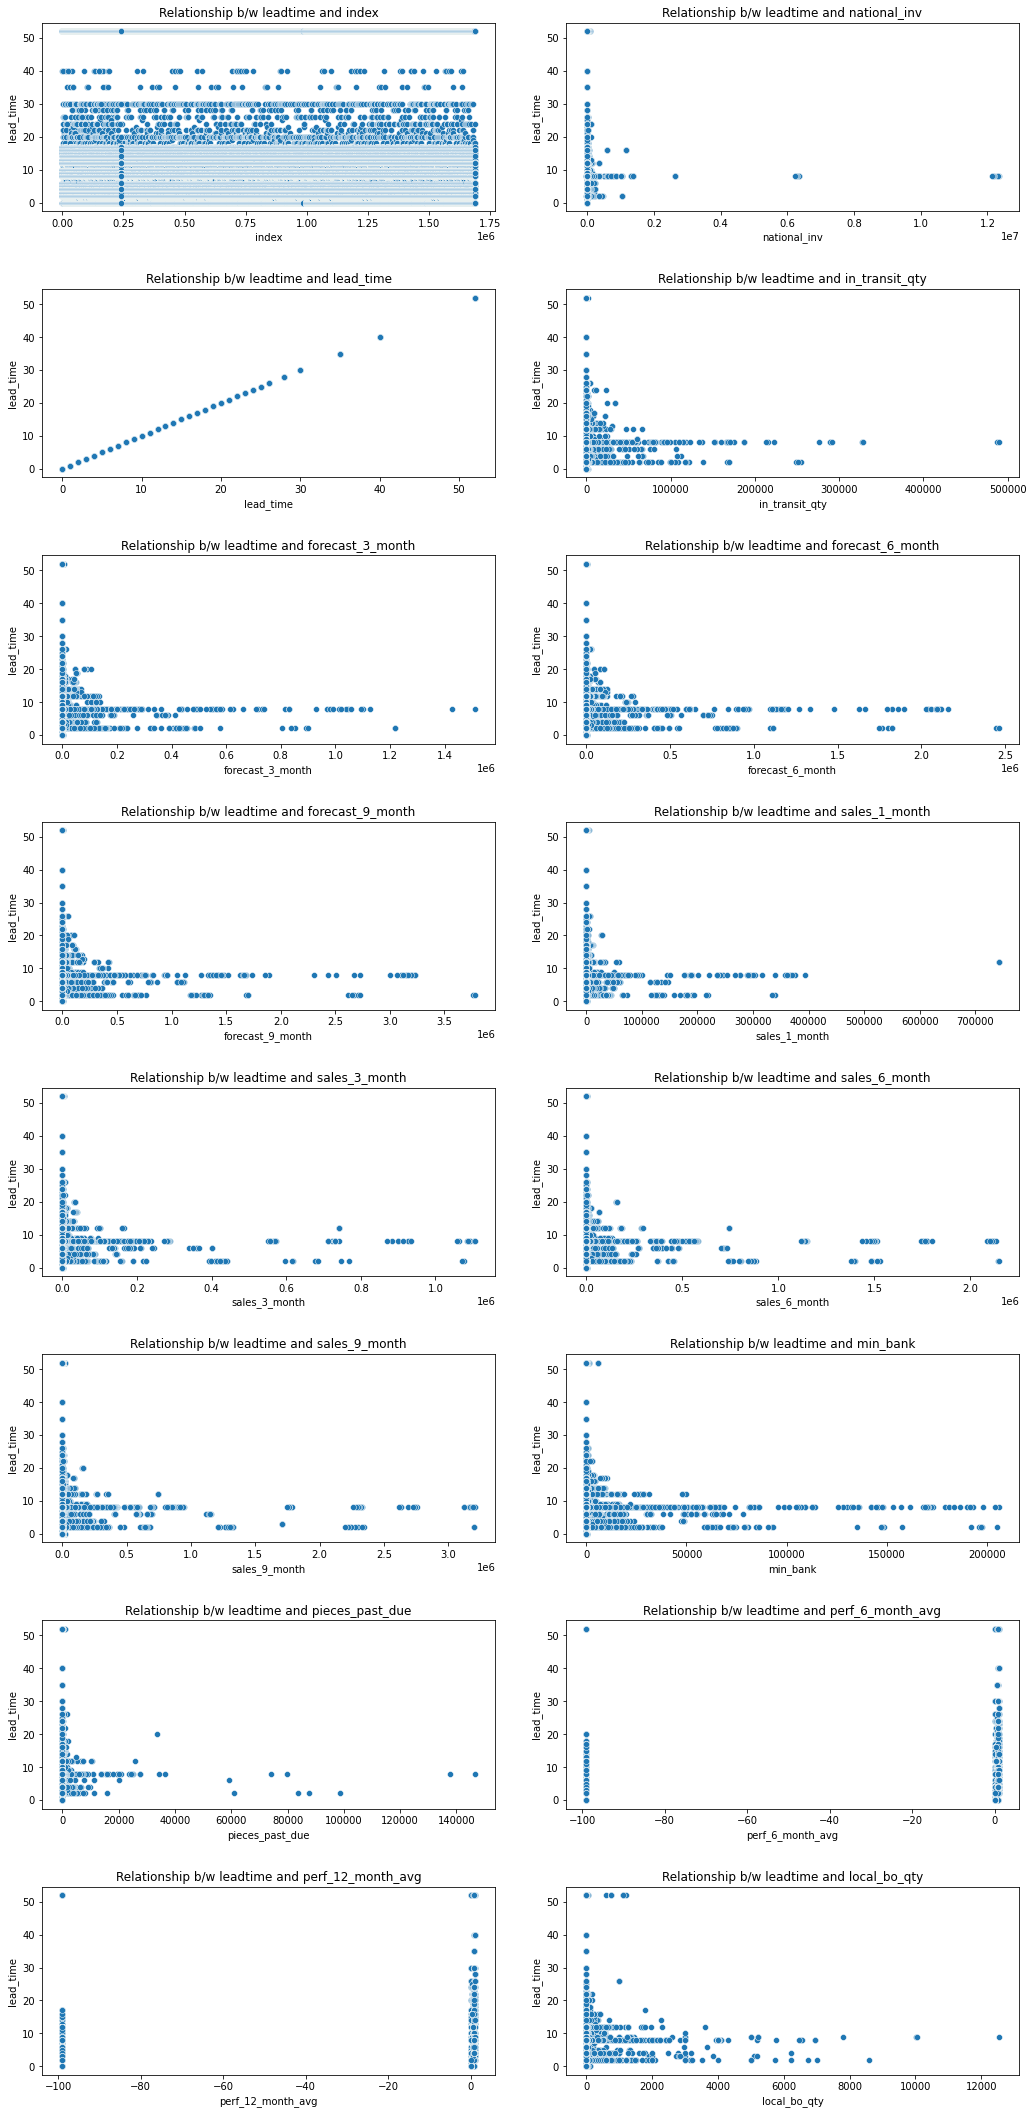

In [41]:
plt.figure(figsize=(15,30))
for index,i in enumerate(final_df.select_dtypes(include=np.number).columns):
    plt.subplot(8,2,index+1)
    plt.tight_layout(pad=3,h_pad=3)
    sns.scatterplot(x=final_df[i],y=final_df.lead_time)
    plt.title(f"Relationship b/w leadtime and {i}")

**Multivariate Analysis**

In [42]:
logger.info("Multivariate Analysis")

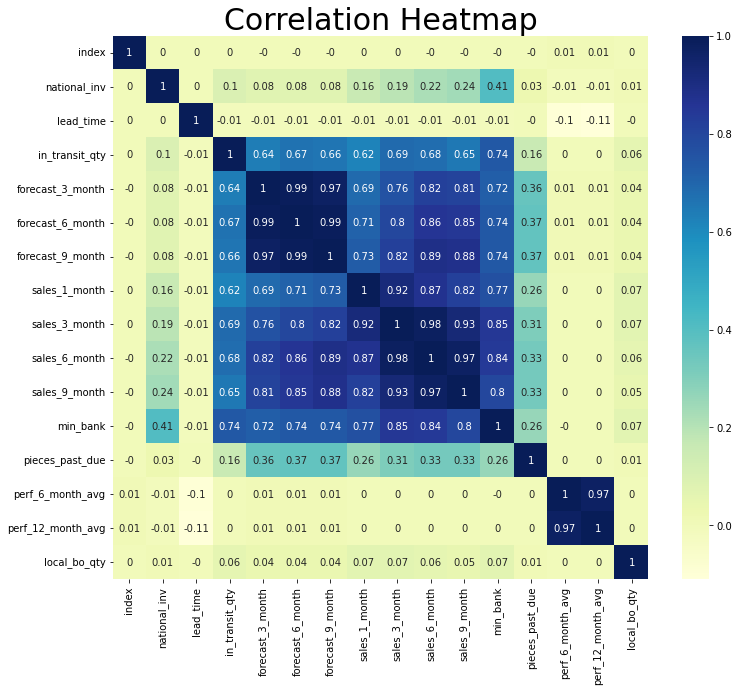

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(round(final_df.corr(),2),annot=True,cmap= "YlGnBu")
plt.title("Correlation Heatmap",size=30)
plt.show()

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
num_cols = final_df.select_dtypes(include=np.number).drop("lead_time",axis=1)
vif = [variance_inflation_factor(num_cols.values,i) for i in range(len(num_cols.columns))]
vif = pd.DataFrame({"Feature":num_cols.columns,"vif":vif})
vif.sort_values("vif",ascending=False,inplace=True)
vif

,Feature,vif
4,forecast_6_month,492.921017
5,forecast_9_month,275.165839
8,sales_6_month,101.114532
3,forecast_3_month,87.635444
7,sales_3_month,55.144204
9,sales_9_month,22.944743
12,perf_6_month_avg,17.296541
13,perf_12_month_avg,17.240374
10,min_bank,7.225292
6,sales_1_month,7.096835


**Changing categorical variables (No- 0 , Yes - 1)**

In [46]:
for col in cat_col:
    final_df[col] = final_df[col].map({'No':0, 'Yes':1})

In [47]:
logger.info(" changed cat_variable , NO->0,Yes->1")

In [48]:
final_df.head()

,index,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


**Treating Missing Values Using Median Imputation**

In [49]:
data_median = final_df.copy()

data_median["lead_time_median"] = data_median["lead_time"].fillna(data_median["lead_time"].median())
data_median.head()

,index,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,lead_time_median
0,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0,8.0
1,1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0,9.0
2,2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0,8.0
3,3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0,8.0
4,4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0,8.0


In [50]:
data_median = data_median.drop(columns = ["lead_time"])

**Checking correlation**

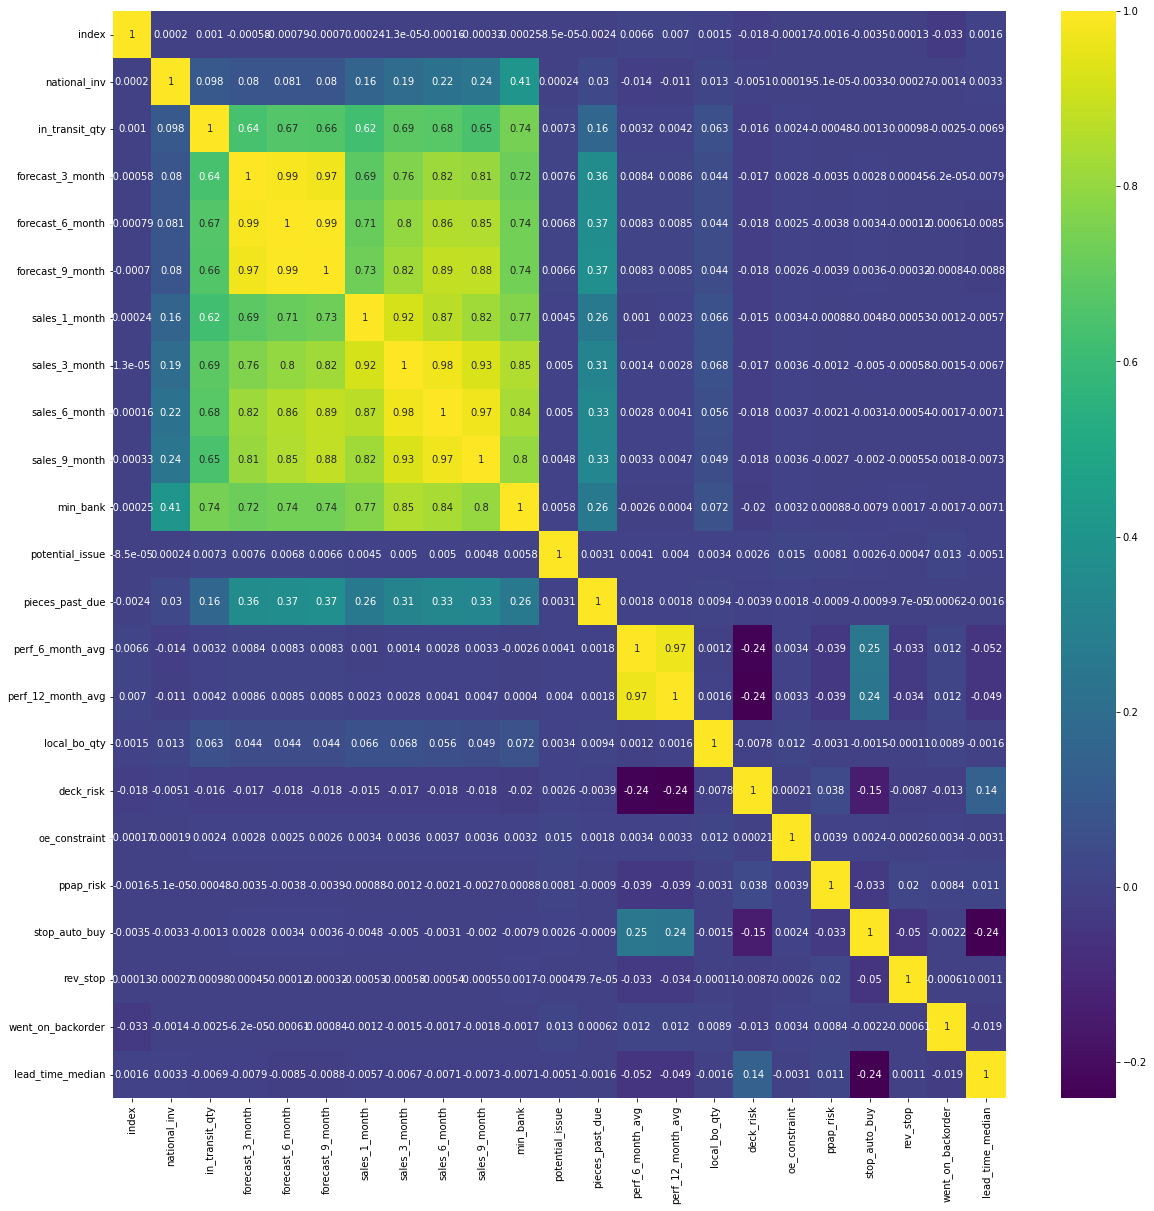

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(data_median.corr(), annot=True,cmap="viridis")
plt.show()

In [52]:
data_median.corr()['went_on_backorder'][:-1].sort_values(ascending=False)

went_on_backorder    1.000000
potential_issue      0.012644
perf_6_month_avg     0.011737
perf_12_month_avg    0.011694
local_bo_qty         0.008907
ppap_risk            0.008377
oe_constraint        0.003420
pieces_past_due      0.000623
forecast_3_month    -0.000062
forecast_6_month    -0.000605
rev_stop            -0.000609
forecast_9_month    -0.000841
sales_1_month       -0.001170
national_inv        -0.001373
sales_3_month       -0.001486
sales_6_month       -0.001727
min_bank            -0.001728
sales_9_month       -0.001776
stop_auto_buy       -0.002180
in_transit_qty      -0.002528
deck_risk           -0.012827
index               -0.033092
Name: went_on_backorder, dtype: float64

**Saving Data**

In [53]:
data_median.to_csv('median_data.csv')

In [54]:
data_median.head()

,index,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,lead_time_median
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0,8.0
1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0,9.0
2,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0,8.0
3,3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0,8.0
4,4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0,8.0


In [55]:
y=data_median["went_on_backorder"]
data_median = data_median.drop(columns = ["went_on_backorder"])

#### Undersampling the Majority Class

In [56]:
from imblearn.under_sampling import NearMiss

 
nm = NearMiss()
data_median , y1 = nm.fit_resample(data_median,y)


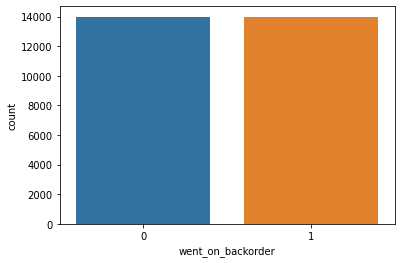

In [57]:
sns.countplot(y1)

**Keeping imp features as predictor and dividing data into train/test**

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [59]:
calc_vif(data_median)

,variables,VIF
0,index,2.007889
1,national_inv,3.407864
2,in_transit_qty,1.458616
3,forecast_3_month,27.005664
4,forecast_6_month,475.486476
5,forecast_9_month,401.160109
6,sales_1_month,3.532509
7,sales_3_month,35.248521
8,sales_6_month,55.269934
9,sales_9_month,23.196355


In [60]:
# Defining the function that you will run later
from joblib import Parallel, delayed

# Defining the function that you will run later
from datetime import datetime 
from joblib import Parallel, delayed

def calculate_vif_(X, thresh=5):
    
        now = datetime.now()
        date = now.date()
        current_time = now.strftime("%H:%M:%S")
        variables = [X.columns[i] for i in range(X.shape[1])]
        dropped=True
        while dropped:
            dropped=False
            print(len(variables))
            vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) 
                                                for ix in range(len(variables)))

            maxloc = vif.index(max(vif))
            if max(vif) > thresh:
                print(str(current_time) + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
                variables.pop(maxloc)
                dropped=True

        print('Remaining variables:')
        print([variables])
        return (variables)

In [61]:
final_list_columns=calculate_vif_(data_median,8)

22


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


14:21:30 dropping 'forecast_6_month' at index: 4
21


[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


14:21:30 dropping 'sales_6_month' at index: 7
20


[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


14:21:30 dropping 'forecast_9_month' at index: 4
19


[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


14:21:30 dropping 'sales_3_month' at index: 5
18


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


14:21:30 dropping 'perf_12_month_avg' at index: 10
17
Remaining variables:
[['index', 'national_inv', 'in_transit_qty', 'forecast_3_month', 'sales_1_month', 'sales_9_month', 'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'lead_time_median']]


[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.5s finished


In [62]:
final_list_columns

['index',
 'national_inv',
 'in_transit_qty',
 'forecast_3_month',
 'sales_1_month',
 'sales_9_month',
 'min_bank',
 'potential_issue',
 'pieces_past_due',
 'perf_6_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'lead_time_median']

In [63]:
''' Seleting the features'''

predictors = ['forecast_6_month', 'forecast_9_month','sales_3_month', 'national_inv','sales_6_month',
              'sales_9_month', 'perf_6_month_avg','perf_12_month_avg', 'forecast_3_month','in_transit_qty','potential_issue']
target_c = 'went_on_backorder'

In [64]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(data_median[predictors],y1, test_size=0.3, random_state=7)

In [65]:
X_train.shape , x_test.shape

((19573, 11), (8389, 11))

In [66]:
Y_train.shape , y_test.shape

((19573,), (8389,))

**Scaling the data using Robust Scaler**

In [67]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler().fit(X_train)
X_train = rb_scaler.transform(X_train)
x_test = rb_scaler.transform(x_test)

#### Implementation of Ml Algorithms

In [ ]:
logger.info("Implementation of Ml Algorithms Started")

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc

**Linear Regression**

In [69]:
logistic_regression = SGDClassifier(loss='log', class_weight='balanced', n_jobs=-1)

In [70]:
params = {'eta0': [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7], 'penalty': ['l1', 'l2']}

In [71]:
logist_grid_search = GridSearchCV(logistic_regression, params, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True)

In [72]:
logist_grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(class_weight='balanced', loss='log',
                                     n_jobs=-1),
             n_jobs=-1,
             param_grid={'eta0': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                  1e-07],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [73]:
best_eta0 = logist_grid_search.best_estimator_.eta0

In [74]:
best_penalty = logist_grid_search.best_estimator_.penalty

In [75]:
best_logist = SGDClassifier(loss='log', learning_rate='constant', eta0=best_eta0, penalty=best_penalty, class_weight='balanced', n_jobs=-1)

In [76]:
best_logist.fit(X_train, Y_train)

SGDClassifier(class_weight='balanced', eta0=1e-05, learning_rate='constant',
              loss='log', n_jobs=-1)

In [77]:
logist_y_pred_train = best_logist.predict(X_train)
logist_y_pred = best_logist.predict(x_test)

In [78]:
print('The accuracy score of the logistic regression model on train set is:', accuracy_score(Y_train, logist_y_pred_train))
print('The accuracy score of the logistic regression model on test set is:', accuracy_score(y_test, logist_y_pred))

The accuracy score of the logistic regression model on train set is: 0.8397281970060798
The accuracy score of the logistic regression model on test set is: 0.8452735725354631


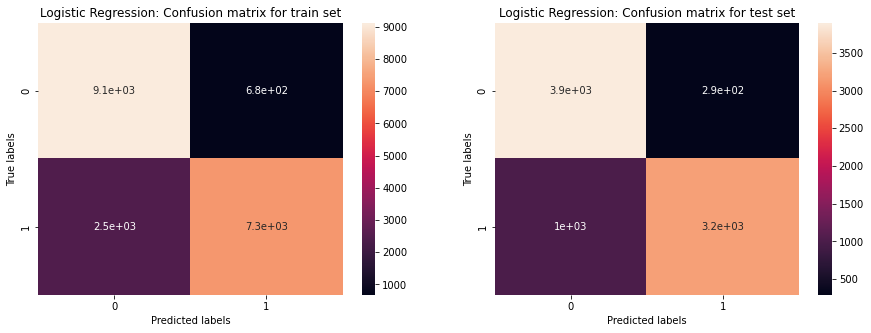

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_train, logist_y_pred_train), annot=True)
plt.title('Logistic Regression: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, logist_y_pred), annot=True)
plt.title('Logistic Regression: Confusion matrix for test set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [80]:
print('The precision score the best logistic regression model on train set is:', precision_score(Y_train, logist_y_pred_train, average='macro'))
print('The precision score the best logistic regression model on test set is:', precision_score(y_test, logist_y_pred, average='macro'))

The precision score the best logistic regression model on train set is: 0.8513631721544659
The precision score the best logistic regression model on test set is: 0.855459870964723


In [81]:
print('The recall score the best logistic regression model on train set is:', recall_score(Y_train, logist_y_pred_train, average='macro'))
print('The recall score the best logistic regression model on test set is:', recall_score(y_test, logist_y_pred, average='macro'))

The recall score the best logistic regression model on train set is: 0.839667758594731
The recall score the best logistic regression model on test set is: 0.8454047246675929


In [82]:
print('The AUC score the best logistic regression model on train set is:', roc_auc_score(Y_train, logist_y_pred_train, average='macro'))
print('The AUC score the best logistic regression model on test set is:', roc_auc_score(y_test, logist_y_pred, average='macro'))

The AUC score the best logistic regression model on train set is: 0.839667758594731
The AUC score the best logistic regression model on test set is: 0.8454047246675929


**Decision Tree**

In [83]:
cart = DecisionTreeClassifier(criterion='gini', class_weight='balanced')

In [84]:
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

In [85]:
cart_grid_search = GridSearchCV(cart, params, cv=5, n_jobs=-1, scoring='roc_auc', return_train_score=True)

In [86]:
cart_grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             return_train_score=True, scoring='roc_auc')

In [87]:
best_max_depth_cart = cart_grid_search.best_estimator_.max_depth

In [88]:
best_cart = DecisionTreeClassifier(criterion='gini', max_depth=best_max_depth_cart, class_weight='balanced')

In [89]:
best_cart.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6)

In [90]:
cart_y_pred_train = best_cart.predict(X_train)
cart_y_pred = best_cart.predict(x_test)

In [91]:
print('The accuracy score of the decision tree model on train set is:', accuracy_score(Y_train, cart_y_pred_train))
print('The accuracy score of the decision tree model on test set is:', accuracy_score(y_test, cart_y_pred))

The accuracy score of the decision tree model on train set is: 0.8817248250140499
The accuracy score of the decision tree model on test set is: 0.8792466324949338


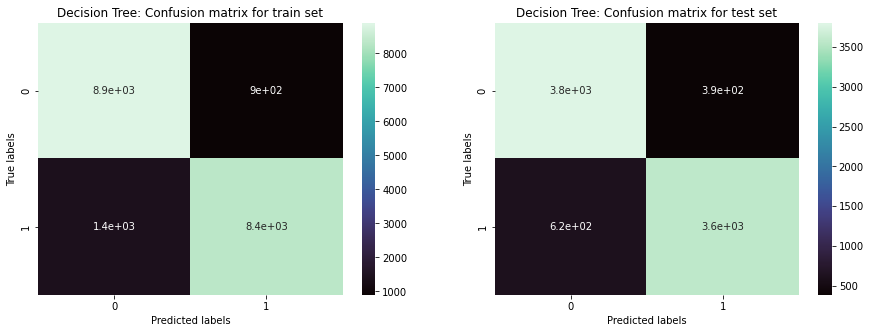

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_train, cart_y_pred_train), annot=True, cmap='mako')
plt.title('Decision Tree: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, cart_y_pred), annot=True, cmap='mako')
plt.title('Decision Tree: Confusion matrix for test set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [93]:
print('The precision score the best decision tree model on train set is:', precision_score(Y_train, cart_y_pred_train, average='macro'))
print('The precision score the best decision tree model on test set is:', precision_score(y_test, cart_y_pred, average='macro'))

The precision score the best decision tree model on train set is: 0.8828191273125281
The precision score the best decision tree model on test set is: 0.8804380668958479


In [94]:
print('The recall score the best decision tree model on train set is:', recall_score(Y_train, cart_y_pred_train, average='macro'))
print('The recall score the best decision tree model on test set is:', recall_score(y_test, cart_y_pred, average='macro'))

The recall score the best decision tree model on train set is: 0.8817070934812792
The recall score the best decision tree model on test set is: 0.8792901221726669


In [95]:
print('The AUC score the best decision tree model on train set is:', roc_auc_score(Y_train, cart_y_pred_train, average='macro'))
print('The AUC score the best decision tree model on test set is:', roc_auc_score(y_test, cart_y_pred, average='macro'))

The AUC score the best decision tree model on train set is: 0.8817070934812792
The AUC score the best decision tree model on test set is: 0.8792901221726669


**Random Forest**

In [96]:
random_forest = RandomForestClassifier(criterion='gini', n_jobs=-1, class_weight='balanced_subsample')

In [97]:
params = {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100], 
          'max_depth':[None, 2, 5, 7, 9, 10, 12, 15, 17, 20, 30, 50],
          'min_samples_leaf':[1,2,3,5,10],
          'min_samples_split':[1,2,3,5,7,10]
          }

In [98]:
forest_random_search = RandomizedSearchCV(random_forest, params, cv=5, n_jobs=-1, scoring='roc_auc', return_train_score=True)


In [99]:
forest_random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 2, 5, 7, 9, 10, 12,
                                                      15, 17, 20, 30, 50],
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': [1, 2, 3, 5, 7,
                                                              10],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 75,
                                                         100]},
                   return_train_score=True, scoring='roc_auc')

In [100]:
best_n_estimators_rf = forest_random_search.best_estimator_.n_estimators


In [101]:
best_max_depth_rf = forest_random_search.best_estimator_.max_depth


In [102]:
best_min_sample_leaf_rf = forest_random_search.best_estimator_.min_samples_leaf

In [103]:
best_min_sample_split_rf = forest_random_search.best_estimator_.min_samples_split

In [104]:
best_est = forest_random_search.best_estimator_
best_est

RandomForestClassifier(class_weight='balanced_subsample', max_depth=50,
                       min_samples_split=5, n_estimators=75, n_jobs=-1)

In [105]:
best_forest = RandomForestClassifier(criterion='gini', n_estimators=best_n_estimators_rf, max_depth=best_max_depth_rf, 
                                     class_weight='balanced_subsample', min_samples_leaf=best_min_sample_leaf_rf, min_samples_split=best_min_sample_split_rf, n_jobs=-1)


In [106]:
best_forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=50,
                       min_samples_split=5, n_estimators=75, n_jobs=-1)

In [107]:
forest_y_pred_train = best_forest.predict(X_train)
forest_y_pred = best_forest.predict(x_test)

In [108]:
print('The accuracy score of the random forest model on train set is:', accuracy_score(Y_train, forest_y_pred_train))
print('The accuracy score of the random forest model on test set is:', accuracy_score(y_test, forest_y_pred))

The accuracy score of the random forest model on train set is: 0.9738926071629285
The accuracy score of the random forest model on test set is: 0.9060674693050423


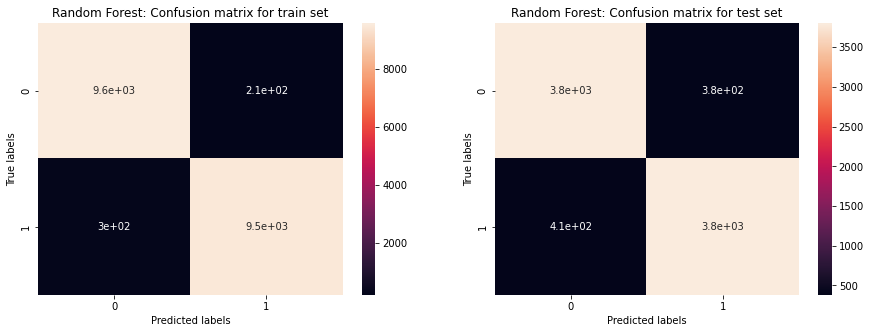

In [109]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_train, forest_y_pred_train), annot=True)
plt.title('Random Forest: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, forest_y_pred), annot=True)
plt.title('Random Forest: Confusion matrix for test set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [110]:
print('The precision score the best random forest model on train set is:', precision_score(Y_train, forest_y_pred_train, average='macro'))
print('The precision score the best random forest model on test set is:', precision_score(y_test, forest_y_pred, average='macro'))

The precision score the best random forest model on train set is: 0.9739382214183991
The precision score the best random forest model on test set is: 0.9060777704341665


In [111]:
print('The recall score the best random forest model on train set is:', recall_score(Y_train, forest_y_pred_train, average='macro'))
print('The recall score the best random forest model on test set is:', recall_score(y_test, forest_y_pred, average='macro'))

The recall score the best random forest model on train set is: 0.9738894398298354
The recall score the best random forest model on test set is: 0.9060716771169461


In [112]:
print('The AUC score the best random forest model on train set is:', roc_auc_score(Y_train, forest_y_pred_train, average='macro'))
print('The AUC score the best random forest model on test set is:', roc_auc_score(y_test, forest_y_pred, average='macro'))

The AUC score the best random forest model on train set is: 0.9738894398298356
The AUC score the best random forest model on test set is: 0.906071677116946


**Gradient Boosted Decision Tree**

In [113]:
gbdt = XGBClassifier(learning_rate=1e-5, scale_pos_weight=148.0, n_jobs=-1)

In [114]:
params = {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100], 
          'max_depth':[2, 3, 5, 7, 9, 10, 12, 15, 17, 20, 30, 50]}

In [115]:
gbdt_random_search = RandomizedSearchCV(gbdt, params, cv=5, n_jobs=-1, scoring='roc_auc', return_train_score=True)

In [116]:
gbdt_random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(learning_rate=1e-05, n_jobs=-1,
                                           scale_pos_weight=148.0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 7, 9, 10, 12, 15,
                                                      17, 20, 30, 50],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 75,
                                                         100]},
                   return_train_score=True, scoring='roc_auc')

In [117]:
best_n_estimators_gbdt = gbdt_random_search.best_estimator_.n_estimators

In [118]:
best_max_depth_gbdt = gbdt_random_search.best_estimator_.max_depth

In [119]:
best_gbdt = XGBClassifier(n_estimators=best_n_estimators_gbdt, max_depth=best_max_depth_gbdt, learning_rate=1e-6,
                          reg_lambda=0.3, min_child_weight=0.10, subsample=0.6, colsample_bytree=0.7, n_jobs=-1)

In [120]:
best_gbdt.fit(X_train, Y_train)

XGBClassifier(colsample_bytree=0.7, learning_rate=1e-06, max_depth=20,
              min_child_weight=0.1, n_estimators=35, n_jobs=-1, reg_lambda=0.3,
              subsample=0.6)

In [121]:
gbdt_y_pred_train = best_gbdt.predict(X_train)
gbdt_y_pred = best_gbdt.predict(x_test)

In [122]:
print('The accuracy score of the gradient boosted decision tree model on train set is:', accuracy_score(Y_train, gbdt_y_pred_train))
print('The accuracy score of the gradient boosted decision tree model on test set is:', accuracy_score(y_test, gbdt_y_pred))

The accuracy score of the gradient boosted decision tree model on train set is: 0.9561130128237879
The accuracy score of the gradient boosted decision tree model on test set is: 0.8980808201215877


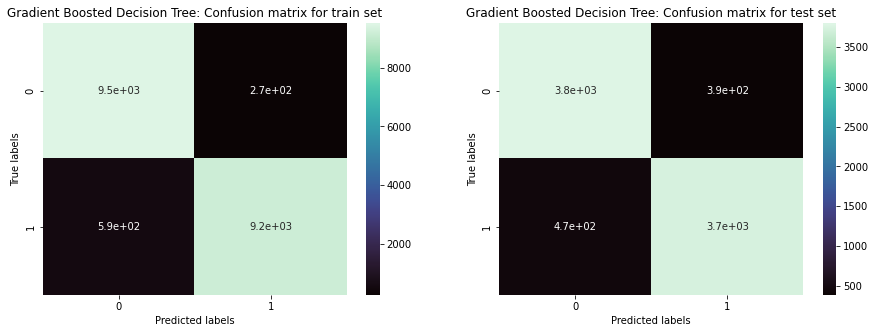

In [123]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_train, gbdt_y_pred_train), annot=True, cmap='mako')
plt.title('Gradient Boosted Decision Tree: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, gbdt_y_pred), annot=True, cmap='mako')
plt.title('Gradient Boosted Decision Tree: Confusion matrix for test set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [124]:
print('The precision score the best gradient boosted decision tree model on train set is:', precision_score(Y_train, gbdt_y_pred_train, average='macro'))
print('The precision score the best gradient boosted decision tree model on test set is:', precision_score(y_test, gbdt_y_pred, average='macro'))

The precision score the best gradient boosted decision tree model on train set is: 0.956600954960927
The precision score the best gradient boosted decision tree model on test set is: 0.8982063362833066


In [125]:
print('The recall score the best gradient boosted decision tree model on train set is:', recall_score(Y_train, gbdt_y_pred_train, average='macro'))
print('The recall score the best gradient boosted decision tree model on test set is:', recall_score(y_test, gbdt_y_pred, average='macro'))

The recall score the best gradient boosted decision tree model on train set is: 0.9561022365418144
The recall score the best gradient boosted decision tree model on test set is: 0.8980947991416062


In [126]:
print('The AUC score the best gradient boosted decision tree model on train set is:', roc_auc_score(Y_train, gbdt_y_pred_train, average='macro'))
print('The AUC score the best gradient boosted decision tree model on test set is:', roc_auc_score(y_test, gbdt_y_pred, average='macro'))

The AUC score the best gradient boosted decision tree model on train set is: 0.9561022365418141
The AUC score the best gradient boosted decision tree model on test set is: 0.8980947991416061


**Saving best model**

We have built 4 models for this case study i.e, Logistic Regression, Decision Tree, Random Forest and Gradient Boosted Decision Tree. Among them we see that Random Forest and Decision Tree are the best performing models. Both of them are giving us a perfect score on all the metrics. Therefore, we can finalize either of the models as our best model. 

In [127]:
import pickle

In [128]:
filename = 'Random Forest.sav'
pickle.dump(best_forest, open(filename, 'wb'))

In [129]:
rob_scale_filename = 'finalized_scalar.pickle'
pickle.dump(rb_scaler, open(rob_scale_filename, 'wb'))

In [130]:
best_model = pickle.load(open(filename, 'rb'))

In [131]:
best_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1])

In [132]:
accuracy_score(y_test, best_model.predict(x_test))

0.9060674693050423

In [133]:
y_pred = best_model.predict_proba(x_test)

**Summary**

In [134]:
from prettytable import PrettyTable

summary = PrettyTable()

summary.field_names = ["Model", "Hyperparameters", "Best Value", "Accuracy", "Precision", "Recall"]
summary.add_row(['Logistic Regression', 'eta0/penalty', [best_eta0, best_penalty],
                 round(accuracy_score(y_test, logist_y_pred), 3), 
                 round(precision_score(y_test, logist_y_pred), 3), 
                 round(recall_score(y_test, logist_y_pred), 3)])
                 
summary.add_row(['Decision Tree', 'max_depth', best_max_depth_cart,
                 round(accuracy_score(y_test, cart_y_pred), 3), 
                 round(precision_score(y_test, cart_y_pred), 3), 
                 round(recall_score(y_test, cart_y_pred), 3)])
                 
summary.add_row(['Random Forest', 'n_estimators/max_depth', [best_n_estimators_rf, best_max_depth_rf],
                 round(accuracy_score(y_test, forest_y_pred), 3), 
                 round(precision_score(y_test, forest_y_pred), 3), 
                 round(recall_score(y_test, forest_y_pred), 3)]) 
                 
summary.add_row(['Gradient Boosted Decision Tree', 'n_estimators/max_depth', [best_n_estimators_gbdt, best_max_depth_gbdt], 
                 round(accuracy_score(y_test, gbdt_y_pred), 3), 
                 round(precision_score(y_test, gbdt_y_pred), 3), 
                 round(recall_score(y_test, gbdt_y_pred), 3)]) 
                 
print(summary)

+--------------------------------+------------------------+---------------+----------+-----------+--------+
|             Model              |    Hyperparameters     |   Best Value  | Accuracy | Precision | Recall |
+--------------------------------+------------------------+---------------+----------+-----------+--------+
|      Logistic Regression       |      eta0/penalty      | [1e-05, 'l2'] |  0.845   |   0.916   | 0.761  |
|         Decision Tree          |       max_depth        |       6       |  0.879   |   0.902   | 0.851  |
|         Random Forest          | n_estimators/max_depth |    [75, 50]   |  0.906   |   0.909   | 0.903  |
| Gradient Boosted Decision Tree | n_estimators/max_depth |    [35, 20]   |  0.898   |   0.906   | 0.889  |
+--------------------------------+------------------------+---------------+----------+-----------+--------+


We see that tree based models perform way better than linear models. Ensemble models like Random Forest and Decision Trees performed the best. We see that the best model is Random Forest model 

In [135]:
loaded_scalar = pickle.load(open('finalized_scalar.pickle', 'rb'))
loaded_model = pickle.load(open('Random Forest.sav', 'rb'))

In [141]:
tranfm_f = loaded_scalar.transform([[3,5,3,0,3,3,0.68,0.58,2,0,0]])

In [142]:
a = loaded_model.predict(tranfm_f)

In [143]:
a

array([1])

In [145]:
tranfm_f = loaded_scalar.transform([[0,0,0,2,0,0,0.99,0.99,0,0,0]])

In [146]:
a = loaded_model.predict(tranfm_f)

In [147]:
a

array([0])